In [56]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import color_sequences as cs
import glob

YEAR = '2022'

In [57]:
paths = glob.glob(f'data\\{YEAR}\\*.csv')
data = pd.concat((pd.read_csv(f) for f in paths), ignore_index=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Document Title          1385 non-null   object 
 1   Authors                 1286 non-null   object 
 2   Author Affiliations     1286 non-null   object 
 3   Publication Title       1385 non-null   object 
 4   Date Added To Xplore    1385 non-null   object 
 5   Publication Year        1385 non-null   int64  
 6   Volume                  1385 non-null   int64  
 7   Issue                   1385 non-null   int64  
 8   Start Page              1385 non-null   object 
 9   End Page                1385 non-null   object 
 10  Abstract                1385 non-null   object 
 11  ISSN                    1385 non-null   object 
 12  ISBNs                   0 non-null      float64
 13  DOI                     1385 non-null   object 
 14  Funding Information     1093 non-null   

In [58]:
data.dropna(how='all', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Document Title          1385 non-null   object 
 1   Authors                 1286 non-null   object 
 2   Author Affiliations     1286 non-null   object 
 3   Publication Title       1385 non-null   object 
 4   Date Added To Xplore    1385 non-null   object 
 5   Publication Year        1385 non-null   int64  
 6   Volume                  1385 non-null   int64  
 7   Issue                   1385 non-null   int64  
 8   Start Page              1385 non-null   object 
 9   End Page                1385 non-null   object 
 10  Abstract                1385 non-null   object 
 11  ISSN                    1385 non-null   object 
 12  DOI                     1385 non-null   object 
 13  Funding Information     1093 non-null   object 
 14  PDF Link                1385 non-null   

In [59]:
data = data[['Authors', 'Author Affiliations', 'Publication Year', 'Funding Information', 'Author Keywords', 'IEEE Terms']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Authors              1286 non-null   object
 1   Author Affiliations  1286 non-null   object
 2   Publication Year     1385 non-null   int64 
 3   Funding Information  1093 non-null   object
 4   Author Keywords      1266 non-null   object
 5   IEEE Terms           1279 non-null   object
dtypes: int64(1), object(5)
memory usage: 65.1+ KB


In [60]:
data.dropna(subset=['Authors', 'Author Affiliations'], inplace=True)
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1286 entries, 0 to 1285
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Authors              1286 non-null   object
 1   Author Affiliations  1286 non-null   object
 2   Publication Year     1286 non-null   int64 
 3   Funding Information  1093 non-null   object
 4   Author Keywords      1266 non-null   object
 5   IEEE Terms           1278 non-null   object
dtypes: int64(1), object(5)
memory usage: 60.4+ KB


In [61]:
data.to_csv(f'data\\{YEAR}\\aggregate\\combined.csv', encoding='utf-8', index=False)
data.head(5)

,Authors,Author Affiliations,Publication Year,Funding Information,Author Keywords,IEEE Terms
0,D. Erricolo,Department of Electrical and Computer Engineer...,2022,NaN,NaN,NaN
1,J. -F. Lin; L. Zhu,"Faculty of Science and Technology, University ...",2022,National Natural Science Foundation of China u...,Characteristic modes analysis (CMA);circular p...,Antenna radiation patterns;Antennas;Perturbati...
2,W. Saadat; S. A. Raurale; G. A. Conway; J. McA...,"Centre for Wireless Innovation (CWI), Institut...",2022,Department for the Economy (DFE) Northern Irel...,Antenna;electric field;radiation efficiency;re...,Antennas;Wrist;Biometrics (access control);Mus...
3,L. Wen; S. Gao; B. Sanz-Izquierdo; C. Wang; W....,"School of Engineering and Digital Arts, Univer...",2022,"EPSRC(grant numbers:EP/N032497/1,EP/P015840/1,...",Circular polarization;coupling stub;crossed di...,Dipole antennas;Couplings;Antennas;Impedance;B...
4,W. Wang; N. C. Garcia; J. D. Chisum,"Department of Electrical Engineering, Universi...",2022,"Department of the Navy, Office of Naval Resear...",Gradient index (GRIN) lens;inhomogeneous media...,Lenses;Impedance;Permittivity;Passband;Antenna...


In [62]:
countries = []

# with open('auth_aff.txt', 'w', encoding='utf-8') as f:
largest = [0, 0]
for i in range(data.shape[0]):
    authors = data ['Authors'][i].split('; ')
    affiliations = data['Author Affiliations'][i].split('; ')
    largest = [max([largest[0], len(authors)]), i if largest[0] < len(authors) else largest[1]]
    for author, aff in zip(authors, affiliations, strict=True):
        # f.write(f'{author}: {aff}\n')
        if aff == 'NA':
            print(author)
        countries.append(aff.split(', ')[-1])

W. A. Johnson


In [63]:
countries = pd.Series(countries, dtype=str)
countries = countries.replace("Republic of Korea", "South Korea")
countries = countries.replace("Korea", "South Korea")
countries = countries.replace("United Arab Emirates", "UAE")
countries = countries.replace("Türkiye", "Turkey")
countries = countries.replace("Türkey", "Turkey")
countries = countries.replace("Hong Kong SAR", "Hong Kong")
countries = countries.replace("Netherlands", "The Netherlands")
countries = countries.replace("SAR", "SAR China")
countries = countries.replace("U.K", "U.K.")
countries = countries.replace("China,", "China")
countries = countries.replace("P. R. China", "China")
print(countries.info())
countries = countries[countries != 'NA']
print(countries.info())
counts = countries.value_counts()
# counts = counts[counts >= 10]
print(counts)
labels = list(counts.keys())
values = list(counts.values)

<class 'pandas.core.series.Series'>
RangeIndex: 5476 entries, 0 to 5475
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
5476 non-null   object
dtypes: object(1)
memory usage: 42.9+ KB
None
<class 'pandas.core.series.Series'>
Index: 5475 entries, 0 to 5475
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
5475 non-null   object
dtypes: object(1)
memory usage: 85.5+ KB
None
China          2904
USA             421
Italy           201
U.K.            178
South Korea     152
               ... 
Sri Lanka         1
Palestine         1
Colombia          1
Kazakhstan        1
Vietnam           1
Name: count, Length: 63, dtype: int64


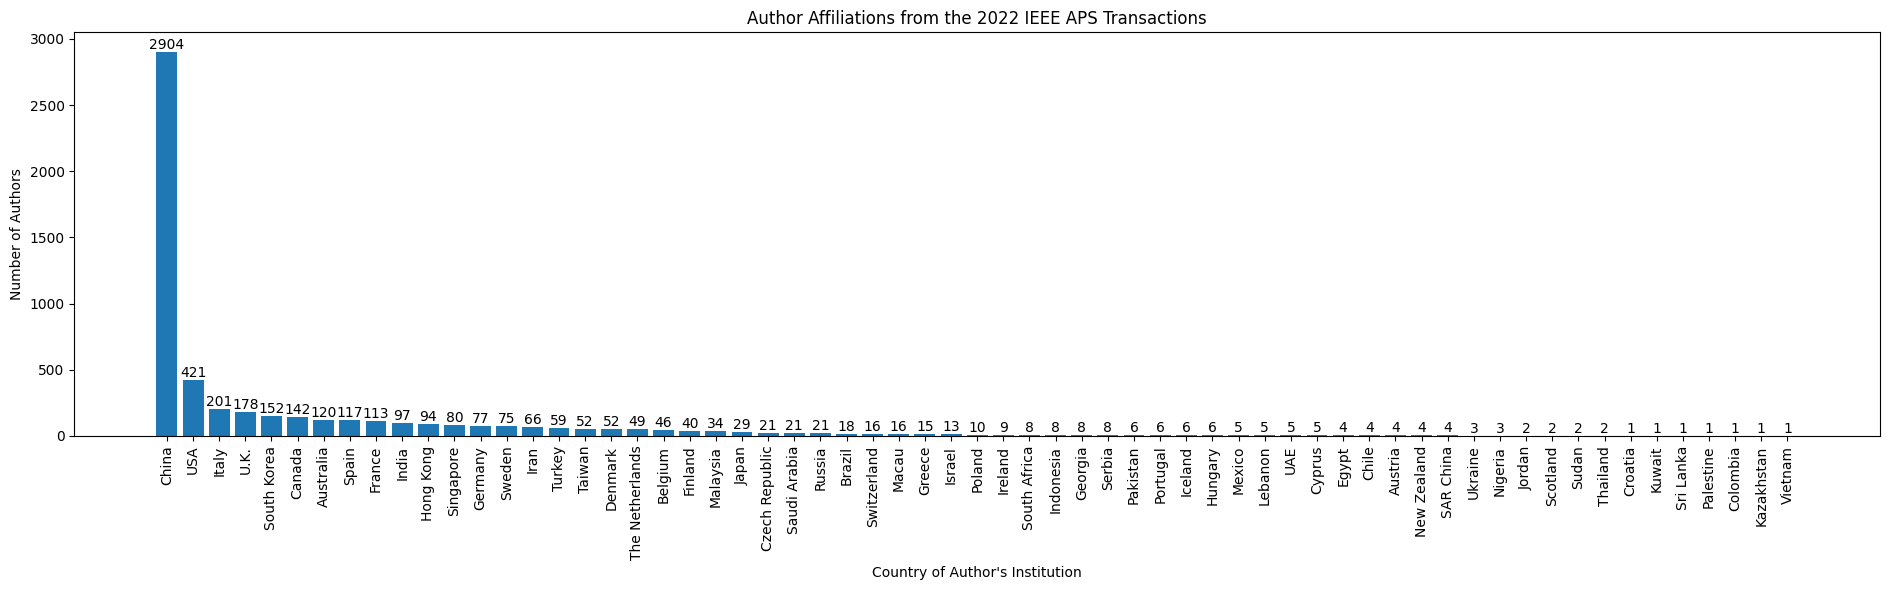

In [64]:
fig, ax = plt.subplots(figsize=(19, 6))
bar_cont = ax.bar(labels, values)
# ax.set(ylim=(0, 1999))
plt.xlabel('Country of Author\'s Institution')
plt.ylabel('Number of Authors')
plt.title(f'Author Affiliations from the {YEAR} IEEE APS Transactions')
plt.xticks(rotation=90)
ax.bar_label(bar_cont)
plt.tight_layout()
plt.savefig(f'figures\\{YEAR}\\{YEAR}_authors_by_country.png', bbox_inches='tight')
plt.show()

In [65]:
super_counts = counts[counts >= 75]
full = counts.sum()
filtered = super_counts.sum()

super_counts['All Other Countries'] = full - filtered

labels = list(super_counts.keys())
values = list(super_counts.values)


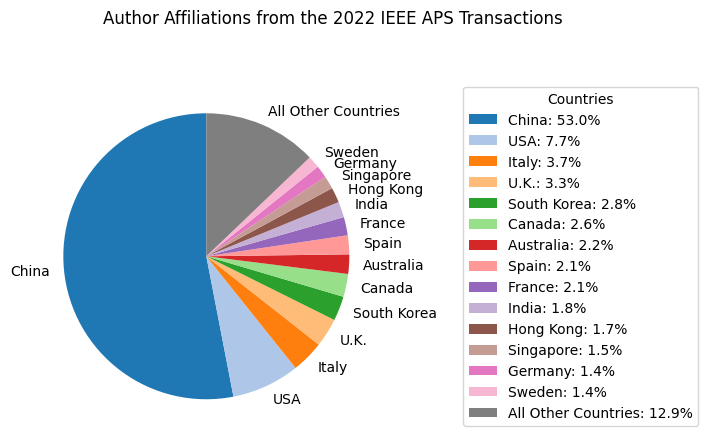

In [66]:

fig, ax = plt.subplots()
wedges, texts = ax.pie(values, labels=labels, startangle=90, colors=cs['tab20'])
percent = [f'{label}: {value/sum(values) * 100:.1f}%' for label, value in zip(labels, values, strict=True)]
ax.legend(wedges, percent, title='Countries', loc='center left', bbox_to_anchor=(1.2, 0, 0.5, 1))
fig.suptitle(f'Author Affiliations from the {YEAR} IEEE APS Transactions')
plt.tight_layout()
plt.savefig(f'figures\\{YEAR}\\{YEAR}_authors_PIE.png', bbox_inches='tight')
plt.show()